# Assignment 7

## 1. Importing Data and Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [3]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# metadata 
print(adult.metadata) 

# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# create df
df = pd.concat([X, y], axis=1)
print(df)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

# 2. Exploratory Data Analysis (EDA):

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# with some basic info about the dataset, we can start to explore the data
# beginning with a correlation matrix with the numerical columns
df.corr()

/var/folders/bt/1vj2mmyj5jngtwt5d3pqf8cm0000gn/T/ipykernel_62512/996728235.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [8]:
# these are the variables that can potentially be correlated with income
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [9]:
# for non-numerical columns
# use value_counts() method to get a count of the unique values in a column
# start by just trying to group 2 columns together
df.groupby(['education','sex'])['income'].value_counts()

education     sex     income
10th          Female  <=50K      292
                      <=50K.     161
                      >50K         3
                      >50K.        1
              Male    <=50K      579
                                ... 
Some-college  Female  >50K.       96
              Male    <=50K     3295
                      <=50K.    1635
                      >50K      1190
                      >50K.      580
Name: income, Length: 120, dtype: int64

In [10]:
# ">50K" is the same as ">50K." and "<=50K" is the same as "<=50K."
# replace these values to make the data easier to work with
df = df.replace("<=50K.", "<=50K")
df = df.replace(">50K.", ">50K")

In [11]:
# try grouping again and see that the data is easier to work with now
df.groupby(['education', 'sex'])['income'].value_counts()

education     sex     income
10th          Female  <=50K      453
                      >50K         4
              Male    <=50K      849
                      >50K        83
11th          Female  <=50K      639
                                ... 
Prof-school   Male    <=50K      148
Some-college  Female  <=50K     3885
                      >50K       293
              Male    <=50K     4930
                      >50K      1770
Name: income, Length: 62, dtype: int64

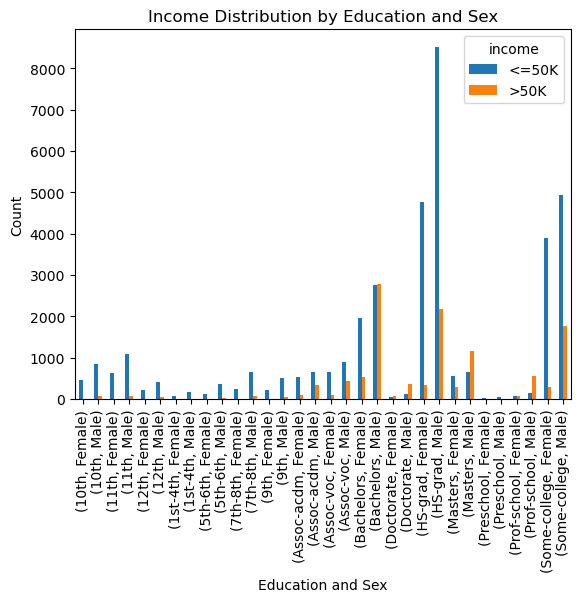

In [12]:
# plot grouped data
grouped_data = df.groupby(['education', 'sex'])['income'].value_counts()

# convert the grouped data to a df
grouped_df = grouped_data.unstack()

# plot the df, although it is not necessarily a great visualization this is just to play around with the data
grouped_df.plot(kind='bar', stacked=False)
plt.xlabel('Education and Sex')
plt.ylabel('Count')
plt.title('Income Distribution by Education and Sex')
plt.show()


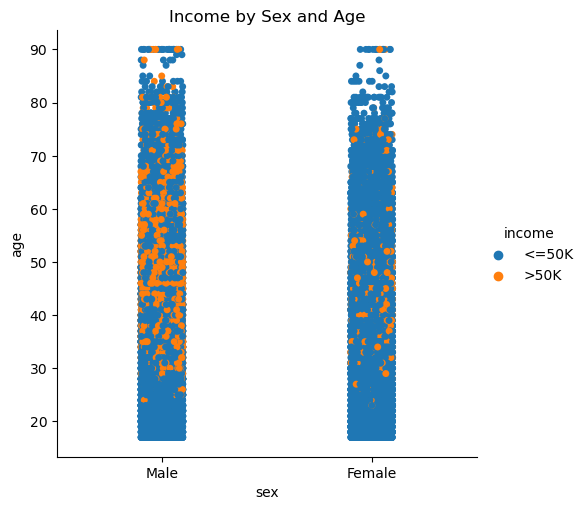

In [19]:
# other ways to visualize categorical data - ticks
sns.catplot(x="sex", y="age", data=df, hue="income").set(title="Income by Sex and Age") 
plt.show()

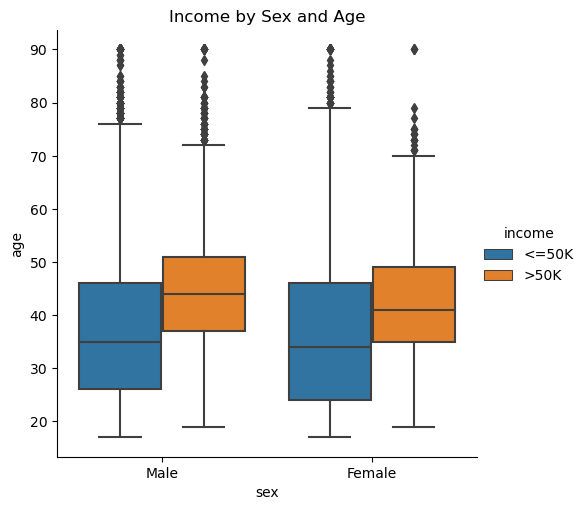

In [20]:
# other ways to visualize categorical data - boxplot
sns.catplot(x="sex", y="age", data=df, hue="income", kind="box").set(title="Income by Sex and Age") 
plt.show()

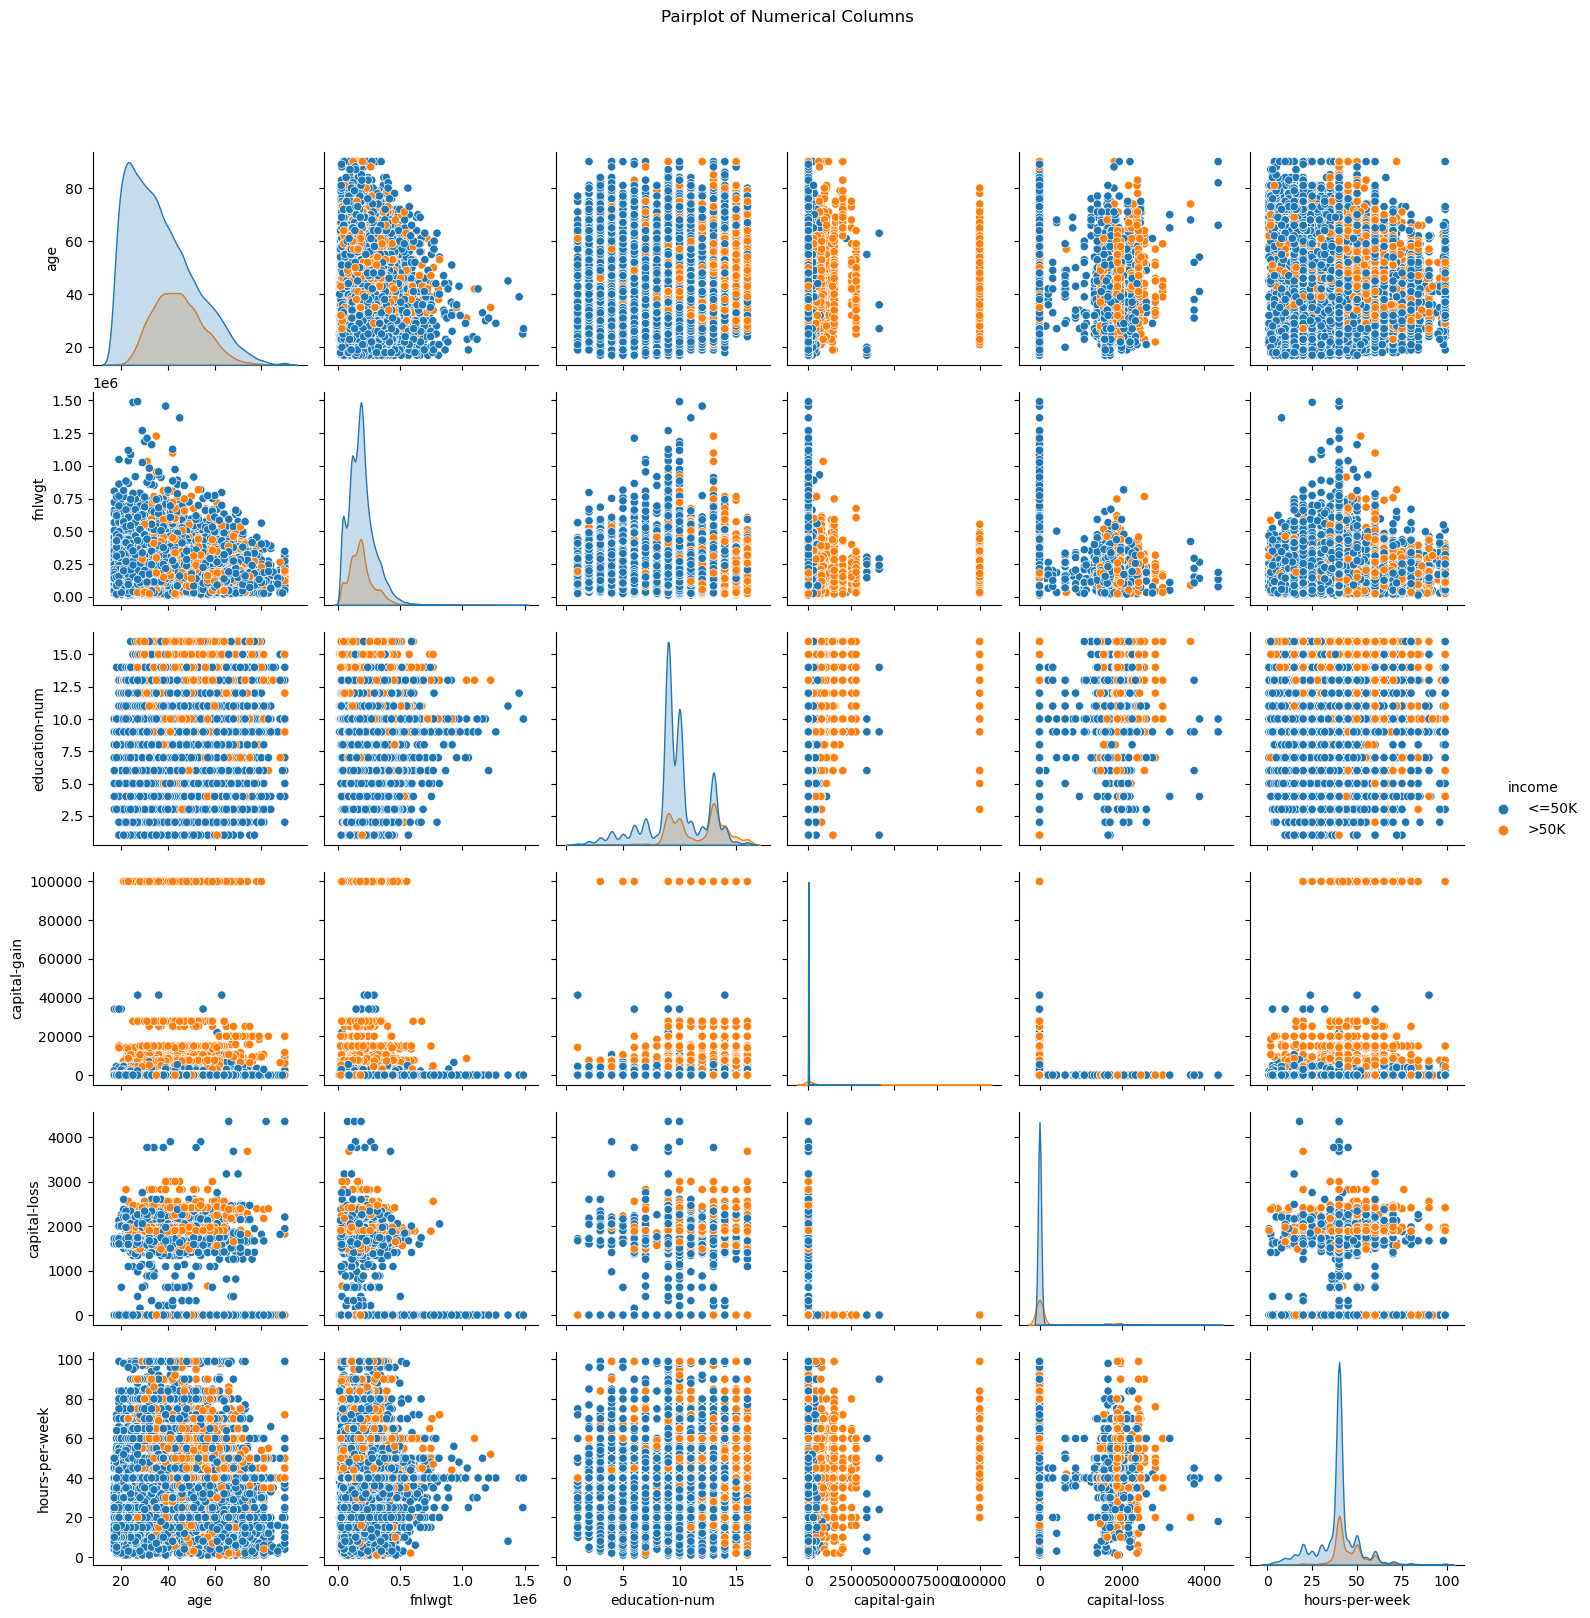

In [22]:
#pairplot with numerical columns to visualize those correlations
pairplot = sns.pairplot(df[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "income"]], hue='income')
pairplot.fig.suptitle("Pairplot of Numerical Columns", y=1.08)
plt.show()

# 3. Hypothesis Formulation:

## Hypothesis 1:
### There is a correlation between the level/length of education with income
The level/length of education report the same information, and as seen in step 2 there appears to be a correlation with higher levels of education/time spent in school with income.

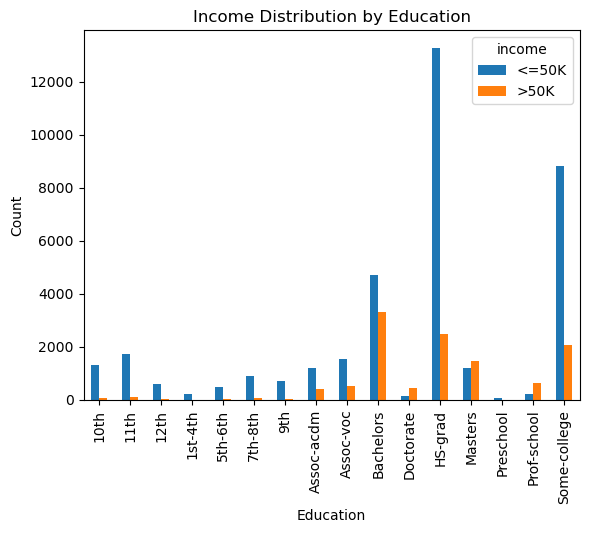

In [26]:
grouped_data = df.groupby(["education"])["income"].value_counts()

# convert the grouped data to a df
grouped_df = grouped_data.unstack()

# plot the df, although it is not necessarily a great visualization this is just to play around with the data
grouped_df.plot(kind='bar', stacked=False)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Income Distribution by Education')
plt.show()

In [28]:
# create table that further looks at these numbers, showing ratio of income >50K to <=50K for each education level
grouped_df['ratio'] = grouped_df['>50K'] / grouped_df['<=50K']
print(grouped_df.sort_values(by='ratio', ascending=False))

income        <=50K  >50K     ratio
education                          
Prof-school     217   617  2.843318
Doctorate       163   431  2.644172
Masters        1198  1459  1.217863
Bachelors      4712  3313  0.703098
Assoc-acdm     1188   413  0.347643
Assoc-voc      1539   522  0.339181
Some-college   8815  2063  0.234033
HS-grad       13281  2503  0.188465
12th            609    48  0.078818
7th-8th         893    62  0.069429
10th           1302    87  0.066820
9th             715    41  0.057343
5th-6th         482    27  0.056017
11th           1720    92  0.053488
1st-4th         239     8  0.033473
Preschool        82     1  0.012195


## Hypothesis 2:
### There is a correlation between occupation with income
This is harder to quantify, but I  that managerial/technical/healthcare roles will earn a higher income. This also might be correlated with education.

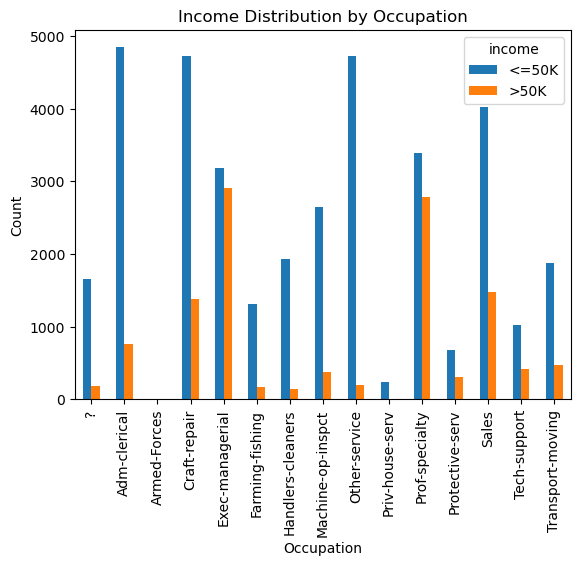

In [31]:
grouped_data = df.groupby(["occupation"])["income"].value_counts()

# convert the grouped data to a df
grouped_df = grouped_data.unstack()

# plot the df, although it is not necessarily a great visualization this is just to play around with the data
grouped_df.plot(kind='bar', stacked=False)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Income Distribution by Occupation')
plt.show()

In [32]:
# create table that further looks at these numbers, showing ratio of income >50K to <=50K for various occupations
grouped_df['ratio'] = grouped_df['>50K'] / grouped_df['<=50K']
print(grouped_df.sort_values(by='ratio', ascending=False))

income             <=50K  >50K     ratio
occupation                              
Exec-managerial     3178  2908  0.915041
Prof-specialty      3388  2784  0.821724
Armed-Forces          10     5  0.500000
Protective-serv      675   308  0.456296
Tech-support        1026   420  0.409357
Sales               4029  1475  0.366096
Craft-repair        4729  1383  0.292451
Transport-moving    1874   481  0.256670
Adm-clerical        4843   768  0.158579
Machine-op-inspct   2650   372  0.140377
Farming-fishing     1317   173  0.131359
?                   1652   191  0.115617
Handlers-cleaners   1934   138  0.071355
Other-service       4719   204  0.043229
Priv-house-serv      239     3  0.012552


Surprisingly, there is more of a distribution within occupations than I expected. Some of them are very consistent such as those with ratios > 0.8 or < 0.2. However, there are many that are in the middle, revealing nuances that can be further explored.